# An Introduction to Data Visualization with R using ggplot2
* **Modeled off of Data Science Dojo's "An Introduction to Data Visualization with R and ggplot2"**
### Contributor : [Research Data Service](https://libraries.uc.edu/research-teaching-support/research-data-services.html), University of Cincinnati Libraries

# Index

* **Introduction to R**
 * What is R 
 * Where R is used
 * Ways to run R
 * Data types
 * Comments<br><br>

* **Hands-on**
 * Install packages
 * Load data
 * Visualize decrete data
 * Visualize continuous data
 * Tell a story using a single plot 
 * Explore other visualizations (Stretched goal 1) 
 * Theme and layout (stretched goal 2)<br><br>

* **Helpful resources**<br><br>

# Introduction to R
### What is R
* General purpose, high level,
 * [Interpreted Language](https://guide.freecodecamp.org/computer-science/compiled-versus-interpreted-languages/)
 * [Object-oriented Language](https://www.freecodecamp.org/news/object-oriented-programming-concepts-21bb035f7260/)

* Simple, Portable, Open source & Powerful

* Stable version release in early 2000 by **Ross Inhaka and Robert Gentleman**

### Ways to run R
* General purpose Integrated Development Environment (IDE) - R stuido, etc
* Web-based interactive computational environment like Jupyter Notebooks, JupyterLab, Google Colaboratory, etc

### [Data types in R](https://www.statmethods.net/input/datatypes.html)
* Vector 
* Matrices
* List
* Data Frame
* Factor
* [Tibble](https://tibble.tidyverse.org/)

### Comments
* Single line commenting symbol is the hash symbol '#'
* The interpreter ignores everything after #
* Leave comments in your code to make it understandable to other team members and for yourself
* hot key to make comment "Ctrl+/"

In [15]:
# This line is ignored

* Multi-line - Use the # on each line of a multiline comment
* Select mulitples lines and "Ctrl+/"

In [16]:
# This is a multiline comment
# This line and the line above are both ignored by the interpreter

# Hands-on
### Install packages

In [17]:
# install.packages("ggplot2")
# install.packages("titantic")
# install.packages("RColorBrewer")
library(ggplot2)
library(titanic)
library(RColorBrewer)

### Load data

In [18]:
### Load the Titanic data set
titanic <- read.csv("/home/rstudio/DataVizwithRandGgplot2/Data/titanic.csv")

In [19]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [20]:
#or  
titanic <- titanic::titanic_train #This data is in a CRAN package called titanic 

In [21]:
#View the data
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [22]:
#Look at the variable structures
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [23]:
#Set up factors
titanic$Pclass <- as.factor(titanic$Pclass)
titanic$Survived <- as.factor(titanic$Survived)
titanic$Sex <- as.factor(titanic$Sex)
titanic$Embarked <- as.factor(titanic$Embarked)
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [24]:
#Summarize the data
summary(titanic)

  PassengerId    Survived Pclass      Name               Sex     
 Min.   :  1.0   0:549    1:216   Length:891         female:314  
 1st Qu.:223.5   1:342    2:184   Class :character   male  :577  
 Median :446.0            3:491   Mode  :character               
 Mean   :446.0                                                   
 3rd Qu.:668.5                                                   
 Max.   :891.0                                                   
                                                                 
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000                     
 Max.   :80.00   Max.   :8.000   Max.   :6.0000           

### Visualize decrete data

In [25]:
#Ggplot Full Template
# ggplot(data = <DATA>) + 
#   <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>),
#                   stat = <STAT>,
#                   position = <POSITION>) +
#   <COORDINATE_FUNCTION> +
#   <FACET_FUNCTION> + 
#   <THEME_FUNCTION>

#DONT FREAK OUT!!!

* **Question 1: What was the survial rate or what was the distribution of survived vs. perished?**
 * Do you remember what type of variable survived is?

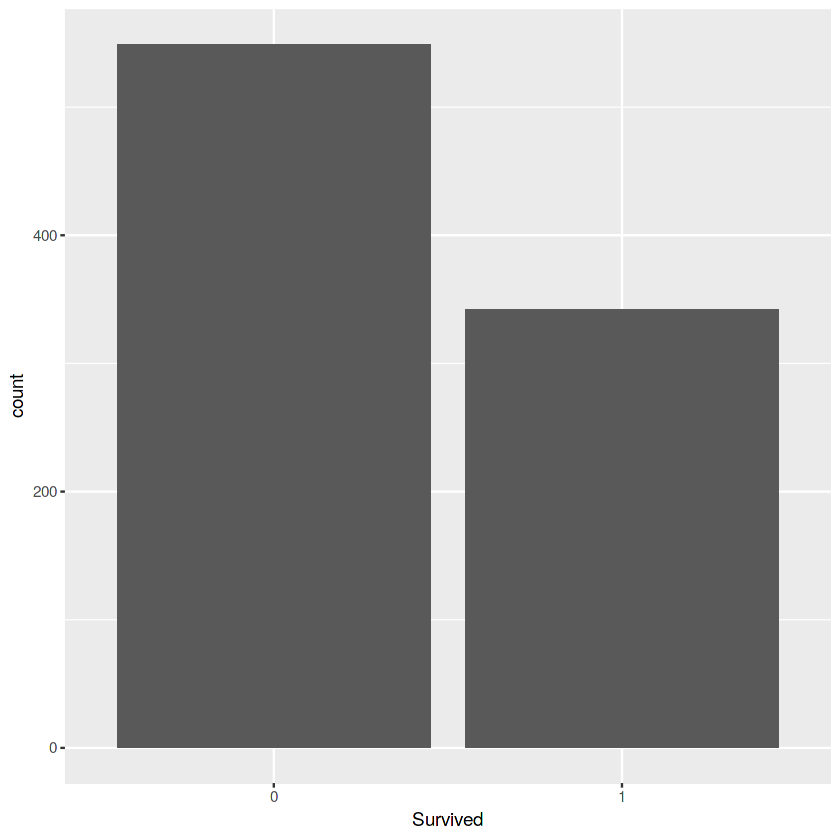

In [26]:
#Plot a bar graph of survival 
ggplot(data = titanic, aes(x = Survived)) + geom_bar()

In [27]:
#Sometimes it is difficult to visualize the exact distributions
#So we can look up the percentages using prop.table()
prop.table(table(titanic$Survived))
#~61% perished and ~38% survived


        0         1 
0.6161616 0.3838384 

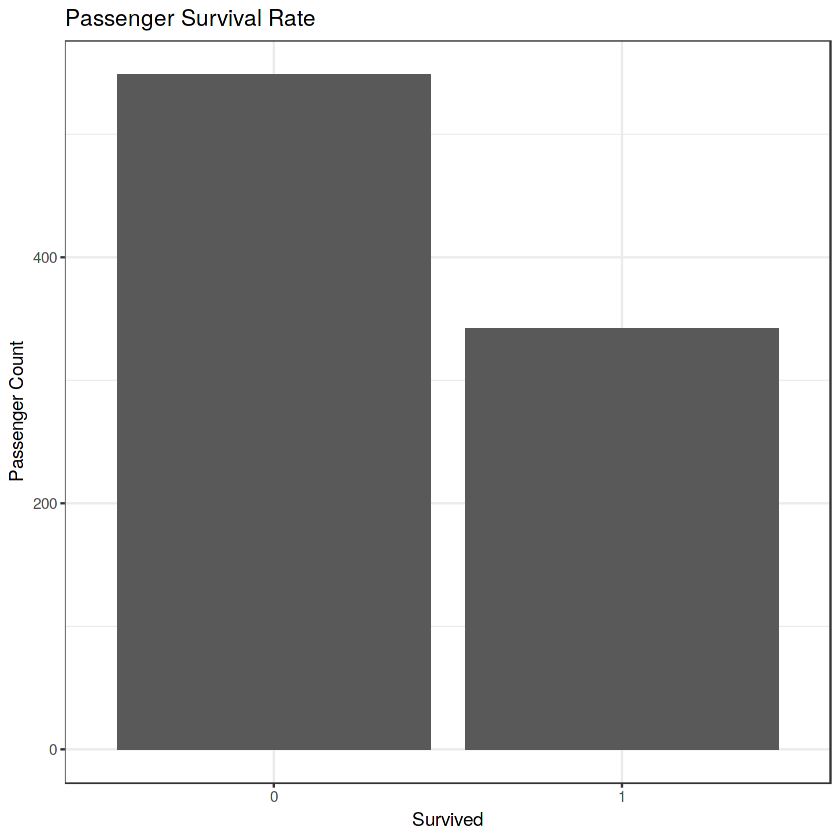

In [28]:
# Lets clean this graph up a bit
#This simple bit of code produced publishable graphics (You just did data visualization!!)
ggplot(titanic, aes(Survived)) + geom_bar() +
  labs(y = "Passenger Count", title = "Passenger Survival Rate") + 
  theme_bw()

* **Question 2: What was the survival rate by gender?**
 * Remember the addage "women and children first"? Is this true?

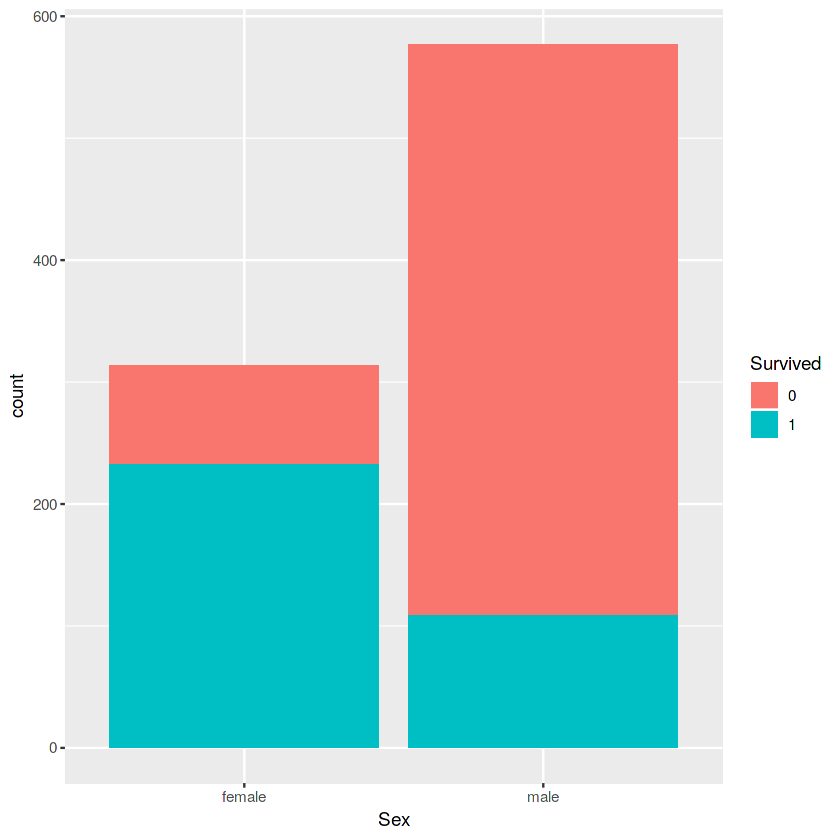

In [29]:
ggplot(data = titanic, aes(x=Sex, fill = Survived)) + geom_bar()

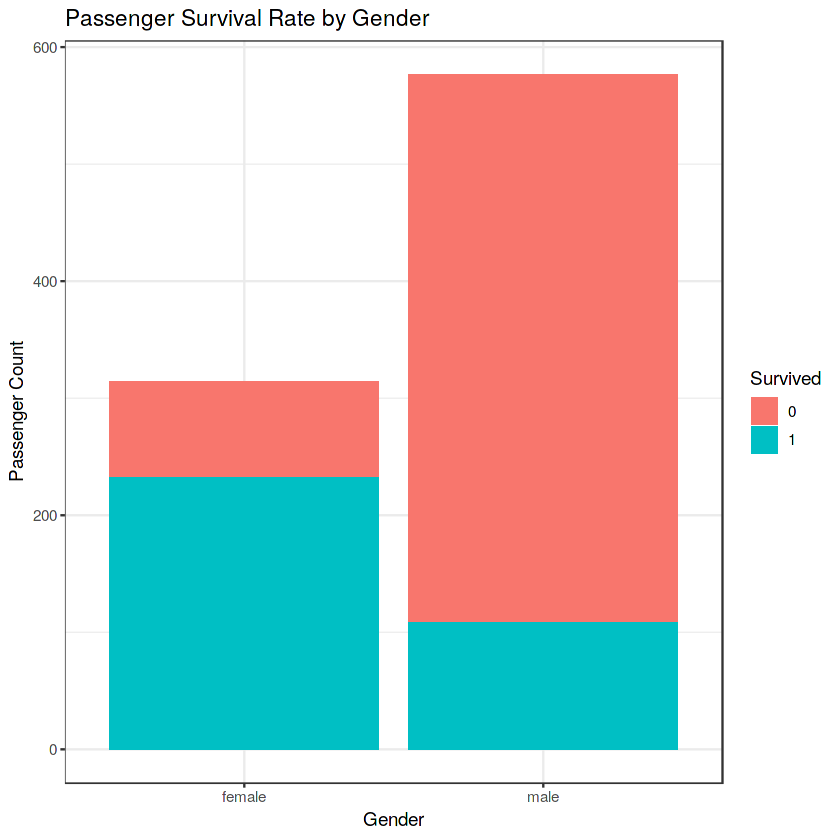

In [30]:
ggplot(titanic, aes(Sex, fill =Survived)) + geom_bar() +
  labs(x = "Gender",y = "Passenger Count", title = "Passenger Survival Rate by Gender") + 
  theme_bw()

* **Question 3: What was the survival rate by ticket class (proxy for socio-economic status)?**
 * Reproducibility example: copy and paste gender code and just change x variable and lables

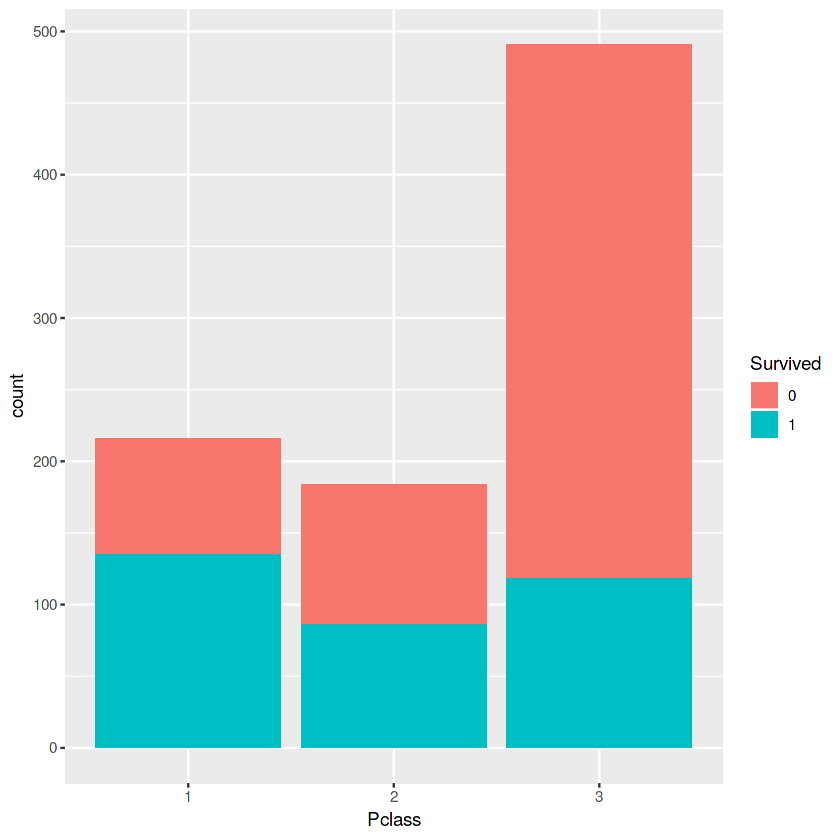

In [31]:
ggplot(data = titanic, aes(x=Pclass, fill = Survived)) + geom_bar()

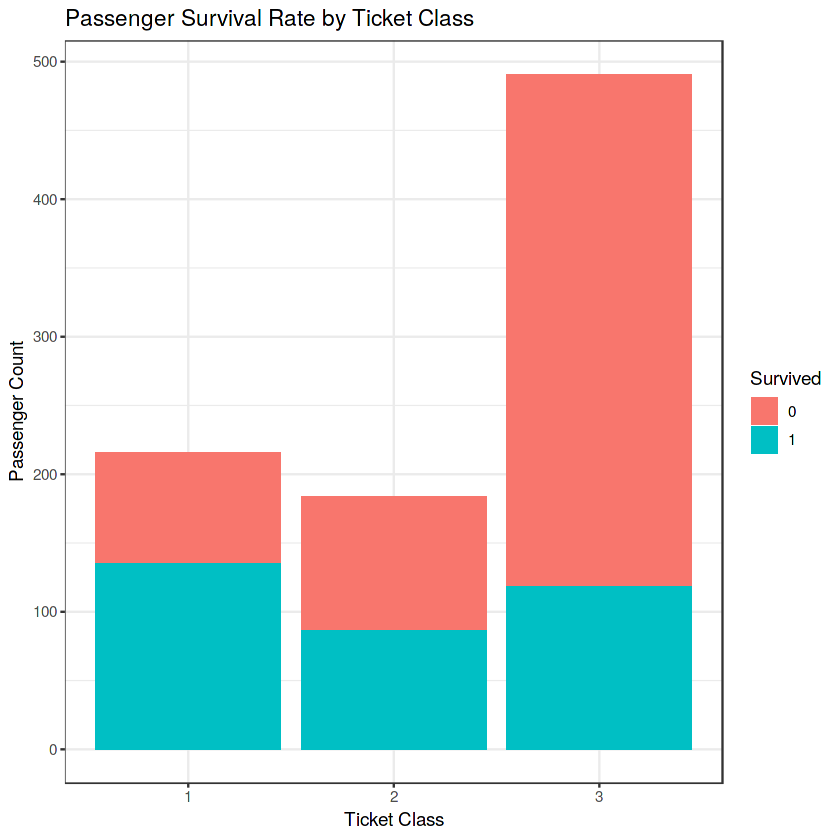

In [32]:
ggplot(titanic, aes(Pclass, fill =Survived)) + geom_bar() +
  labs(x = "Ticket Class",y = "Passenger Count", title = "Passenger Survival Rate by Ticket Class") + 
  theme_bw()

* **Question 4: What was the survival rate of gender AND Ticket class?**
 * Use facet_wrap to examine how multiple variables interact and allow us to dive deeper into the data

In [33]:
#Look up facet_wrap()
?facet_wrap

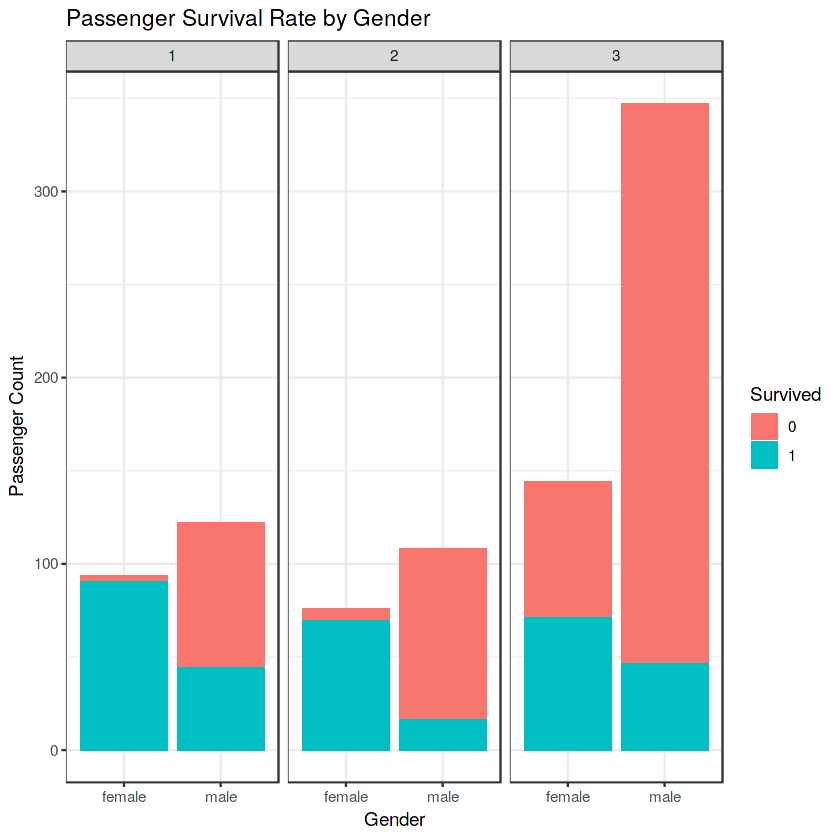

In [34]:
ggplot(titanic, aes(Sex, fill =Survived)) + 
  geom_bar() +
  facet_wrap(~Pclass) +
  labs(x = "Gender",y = "Passenger Count", title = "Passenger Survival Rate by Gender") + 
  theme_bw()

###### What trends do you see? What gender and ticket classes are most and least likely to survive?

### Visualize continuous data
* **Question 5: What was the distribution of passenger ages**
 * Histogram are similiar to bar charts except they use numerical/continuous data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


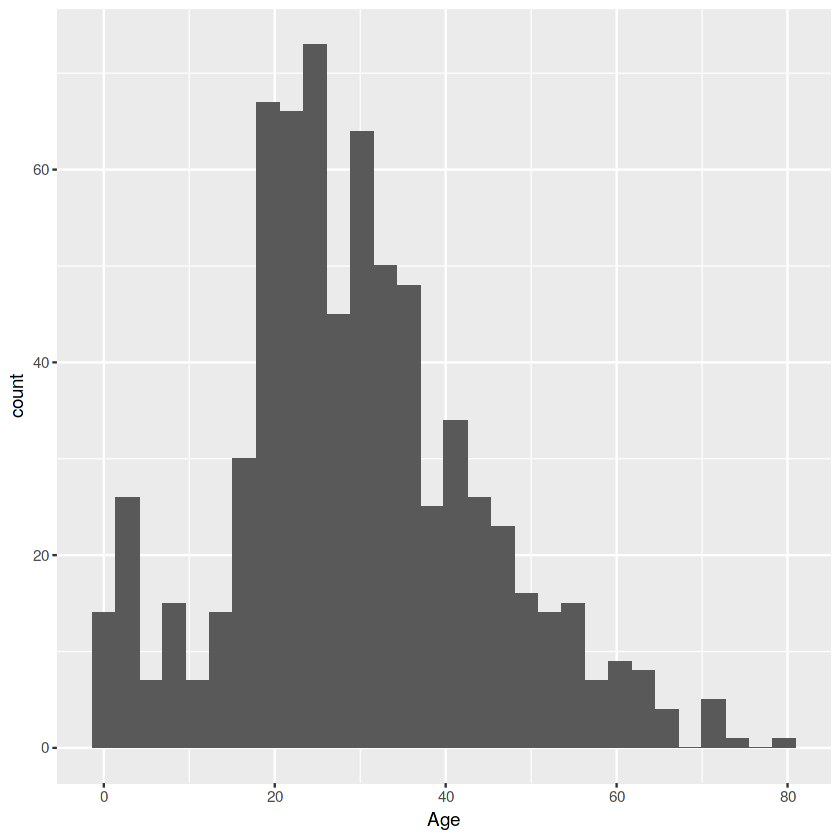

In [35]:
ggplot(titanic, aes(x = Age)) + geom_histogram()

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


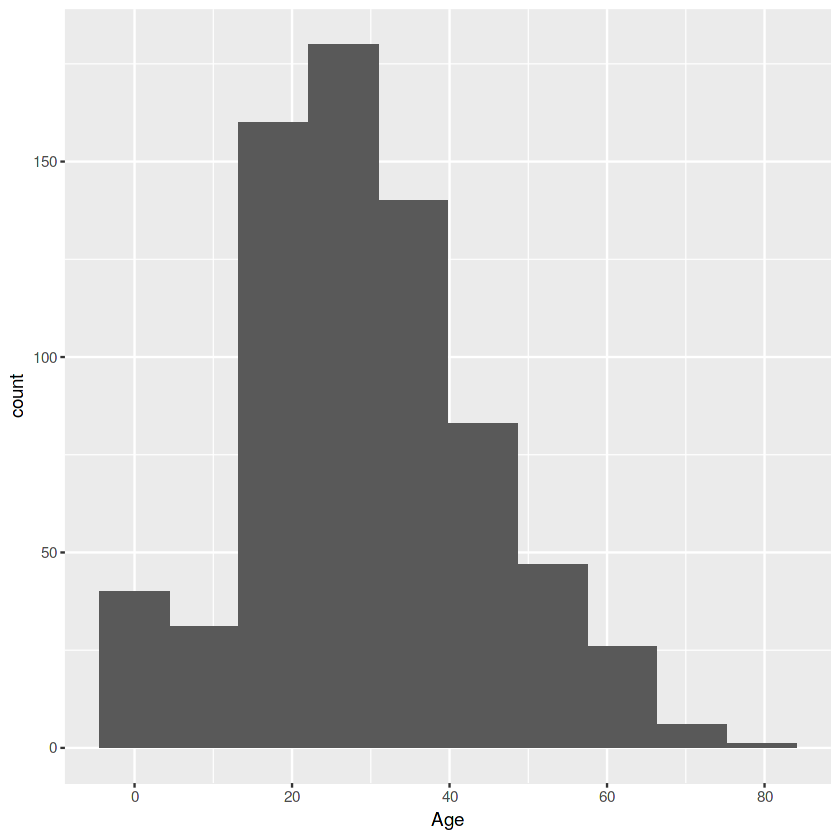

In [36]:
#You can specify the number of bins
ggplot(titanic, aes(x = Age)) + geom_histogram(bins = 10)

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


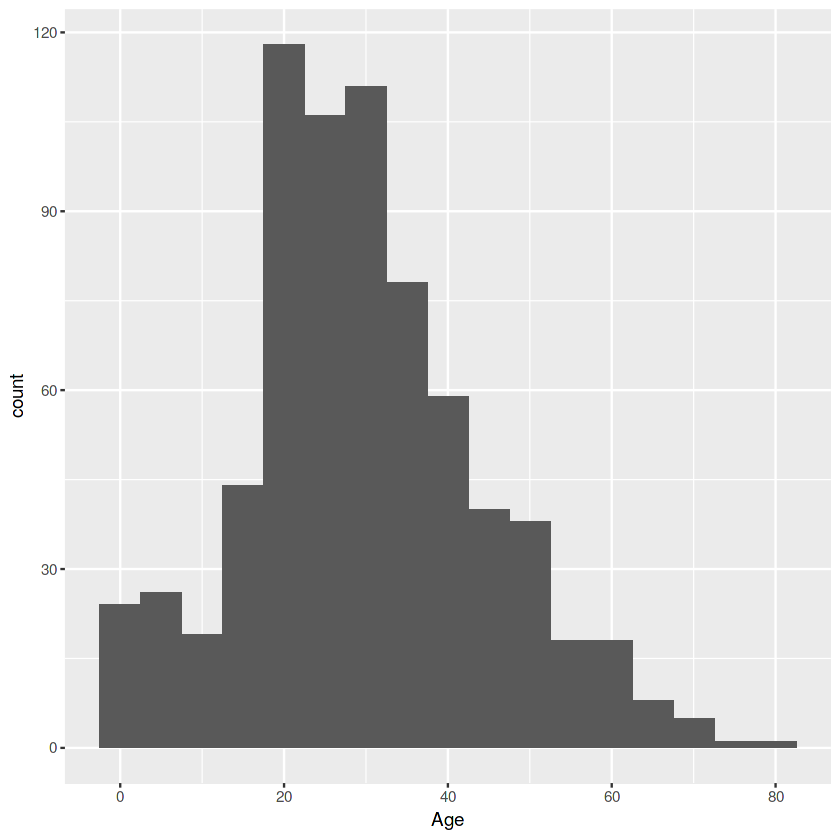

In [37]:
#Or define the bin width (column groupings)
ggplot(titanic, aes(x = Age)) + geom_histogram(binwidth = 5)

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


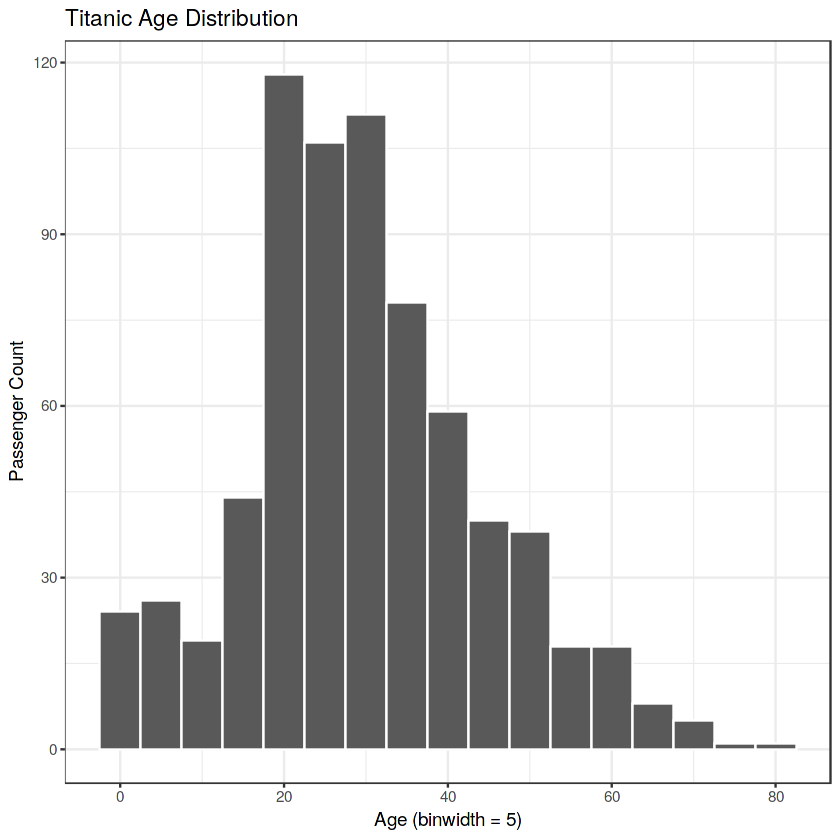

In [38]:
#Lets clean this graph up
ggplot(titanic, aes(x = Age)) +
  geom_histogram(binwidth = 5, color = "white") +
  labs(x = "Age (binwidth = 5)",y = "Passenger Count", title = "Titanic Age Distribution") + 
  theme_bw()

* **Question 6: What were the survival rate of passengers by age?**

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


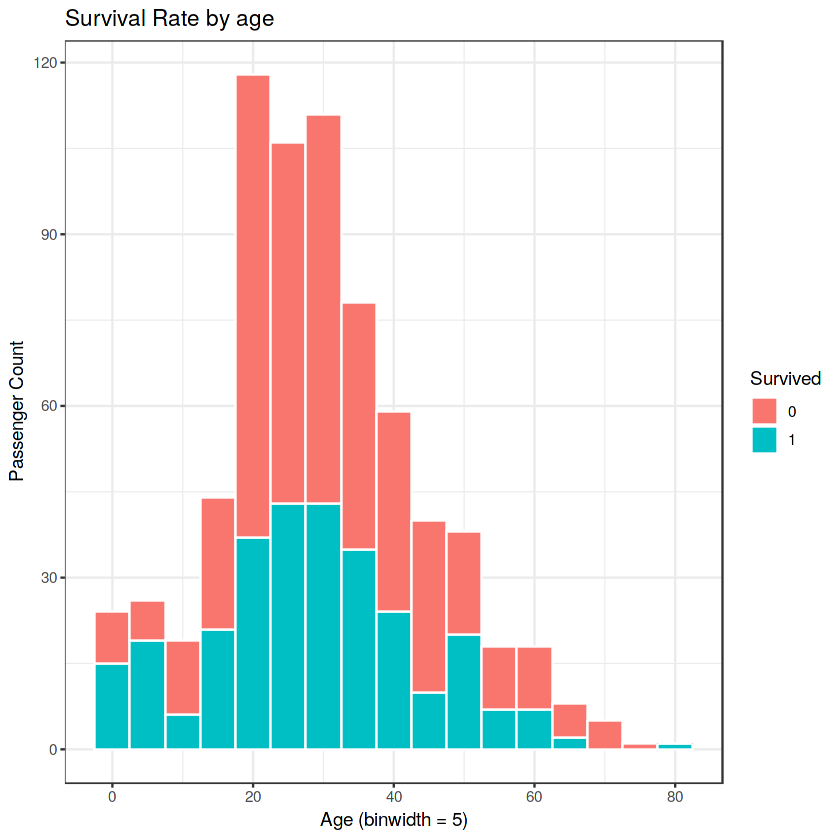

In [39]:
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5, color = "white") +
  labs(x = "Age (binwidth = 5)",y = "Passenger Count", title = "Survival Rate by age") + 
  theme_bw()

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”


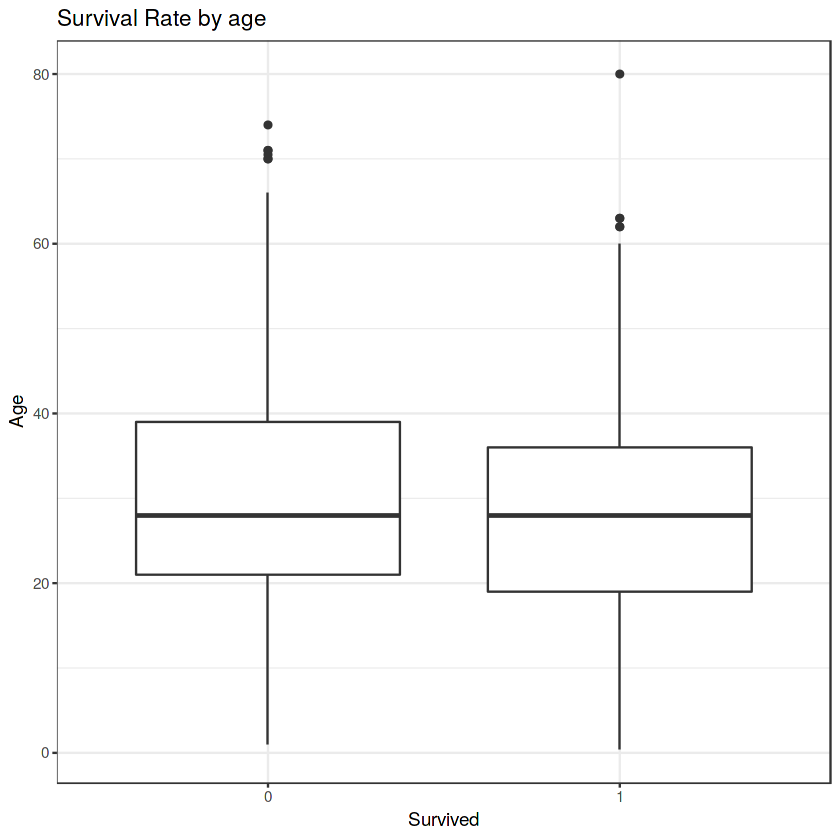

In [40]:
#Alternative: We want to derive basic statistics on survial rates by age?
#box-and-whisker
ggplot(titanic, aes(x = Survived, y = Age)) +
  geom_boxplot() +
  labs(x = "Survived",y = "Age", title = "Survival Rate by age") + 
  theme_bw()
#No real discernible pattern between survival and age

In [41]:
#Need help remembering how to interpt a box-and-whisker graph?
?geom_boxplot #Computed variables

### Tell a story using a single plot

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


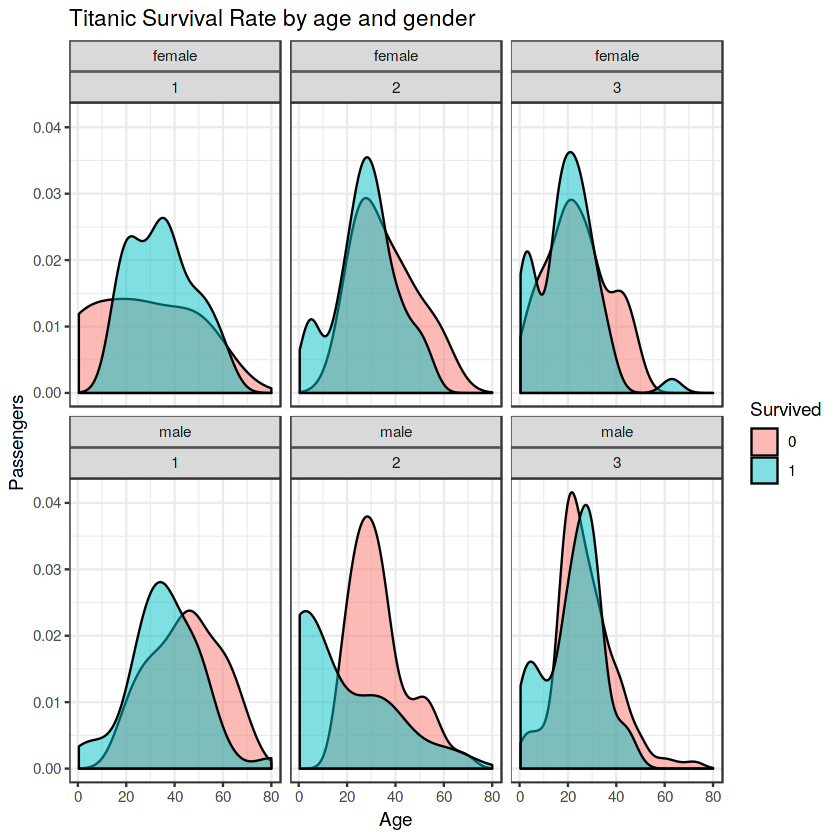

In [42]:
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_density(alpha = 0.5) + #Alpha is transparency control
  facet_wrap(Sex ~ Pclass) +
  labs(x = "Age",y = "Passengers", title = "Titanic Survival Rate by age and gender") + 
  theme_bw()

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


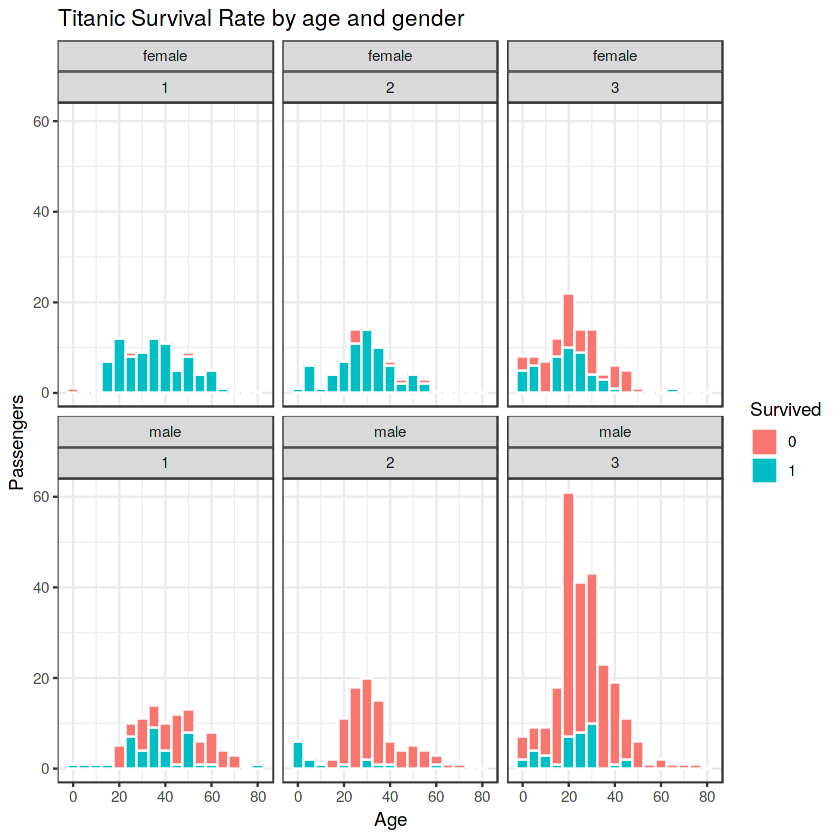

In [43]:
#Personally I find the interpretation of the density map a litte difficult 
#So I prefer a histogram
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  facet_wrap(Sex ~ Pclass) +
  labs(x = "Age",y = "Passengers", title = "Titanic Survival Rate by age and gender") + 
  theme_bw()

### Explore other visualizations (Stretched goal 1)

Warning message:
“Removed 177 rows containing missing values (geom_point).”


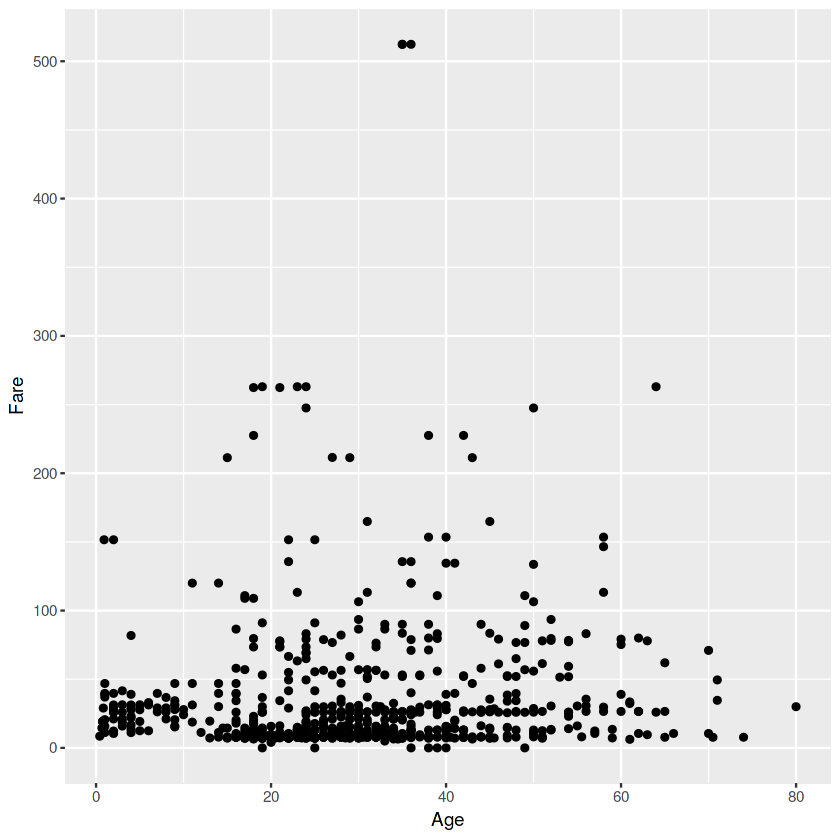

In [44]:
#Scatterpot
ggplot(titanic, aes(Age,Fare)) +geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 177 rows containing non-finite values (stat_smooth).”


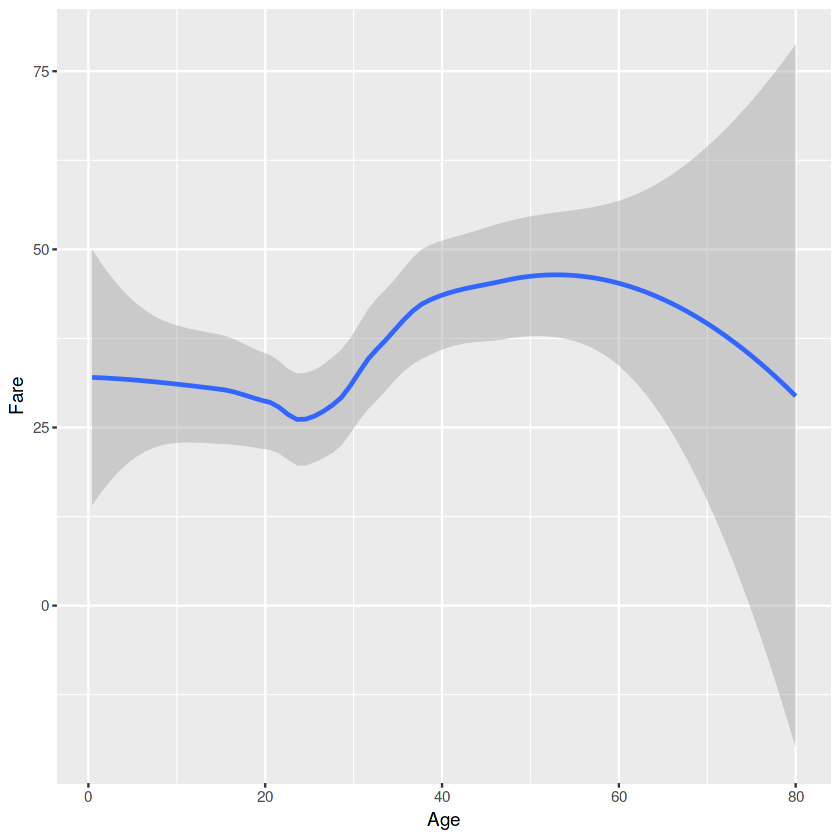

In [45]:
#Smoothed average
ggplot(titanic, aes(Age,Fare)) +geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 177 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 177 rows containing missing values (geom_point).”


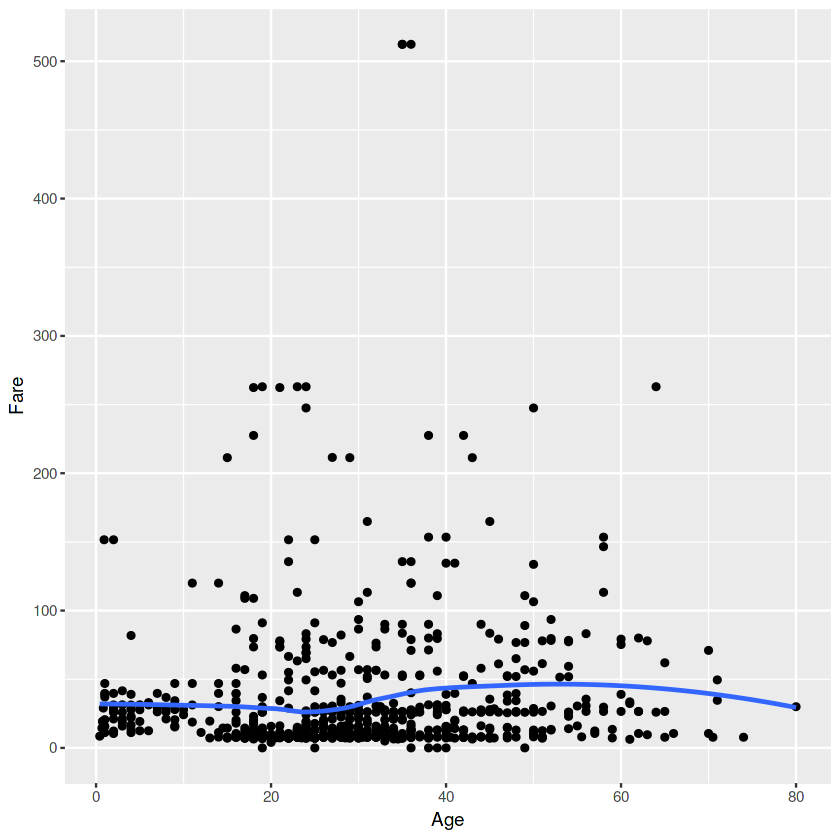

In [46]:
#Combined scatter with smoothed average
ggplot(titanic, aes(Age,Fare)) +
  geom_point() +
  geom_smooth(se = FALSE)

Warning message:
“Removed 177 rows containing non-finite values (stat_ydensity).”


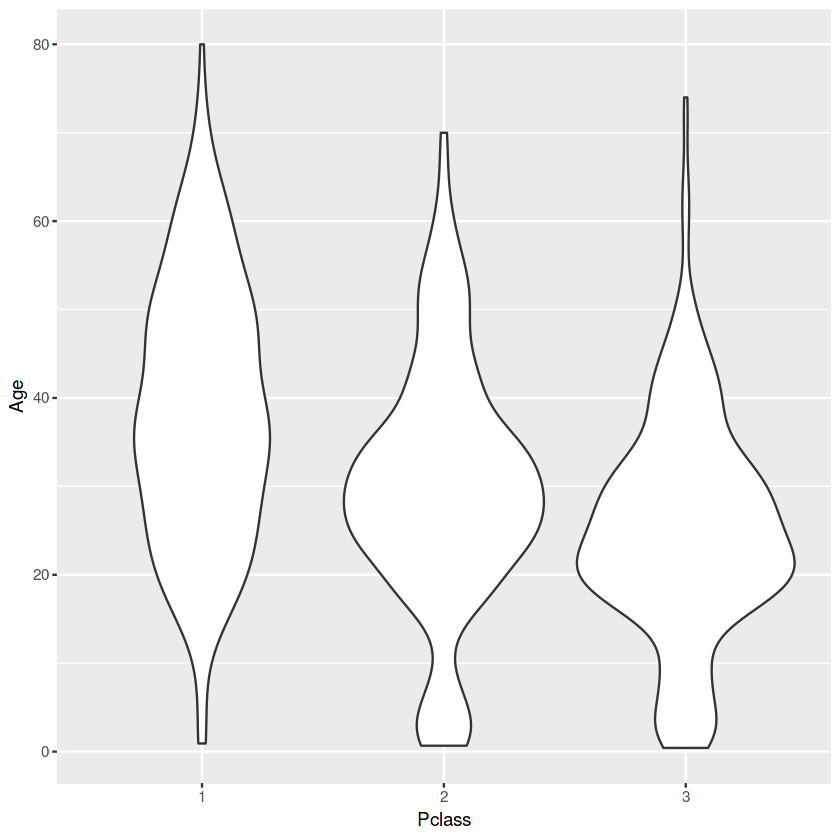

In [47]:
##Violin Graphs
ggplot(titanic, aes(Pclass,Age)) +
  geom_violin()

### Theme and layout (Stretched goal 2)

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


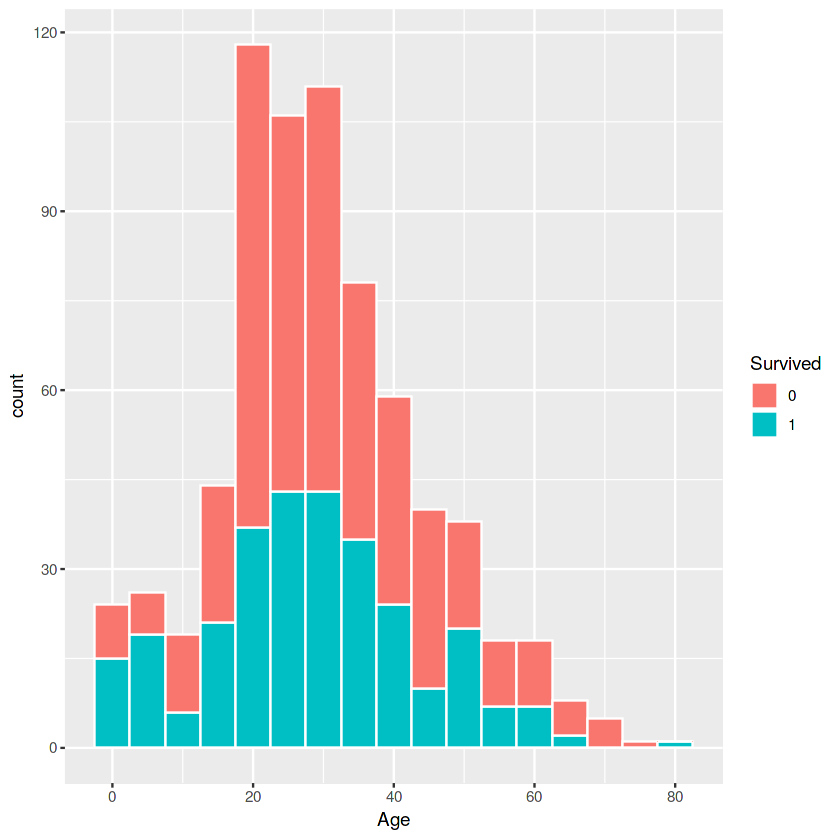

In [48]:
#Basic Plot
ggplot(titanic, aes(x = Age, fill = Survived)) + 
  geom_histogram(binwidth = 5,color = "white")

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


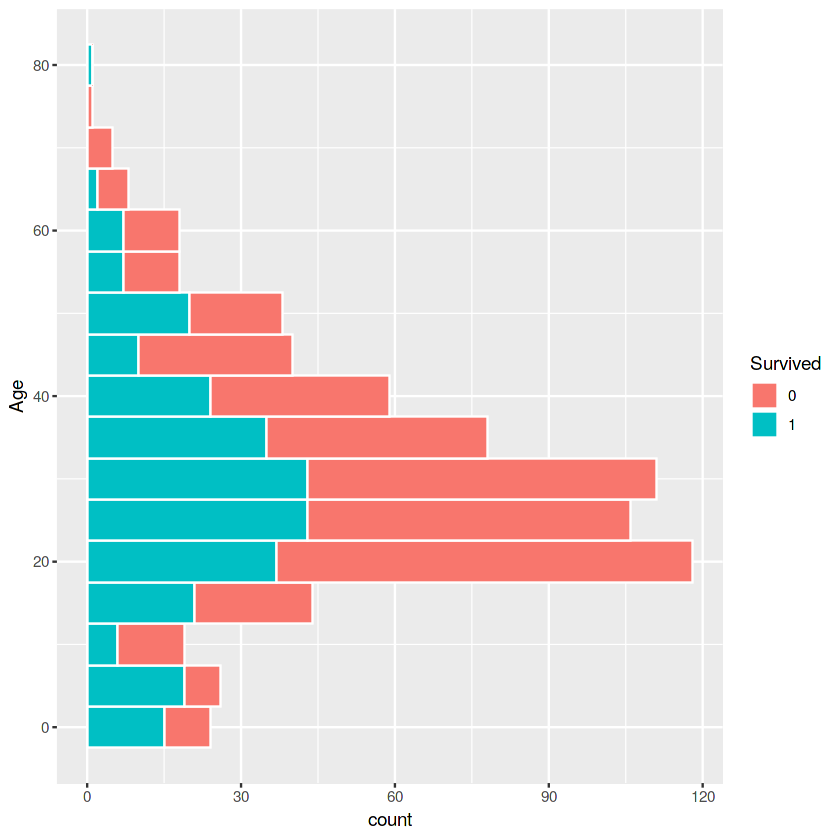

In [49]:
#Flipping Axes
#ONlY IF IT MAKES SENSE
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  coord_flip()

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


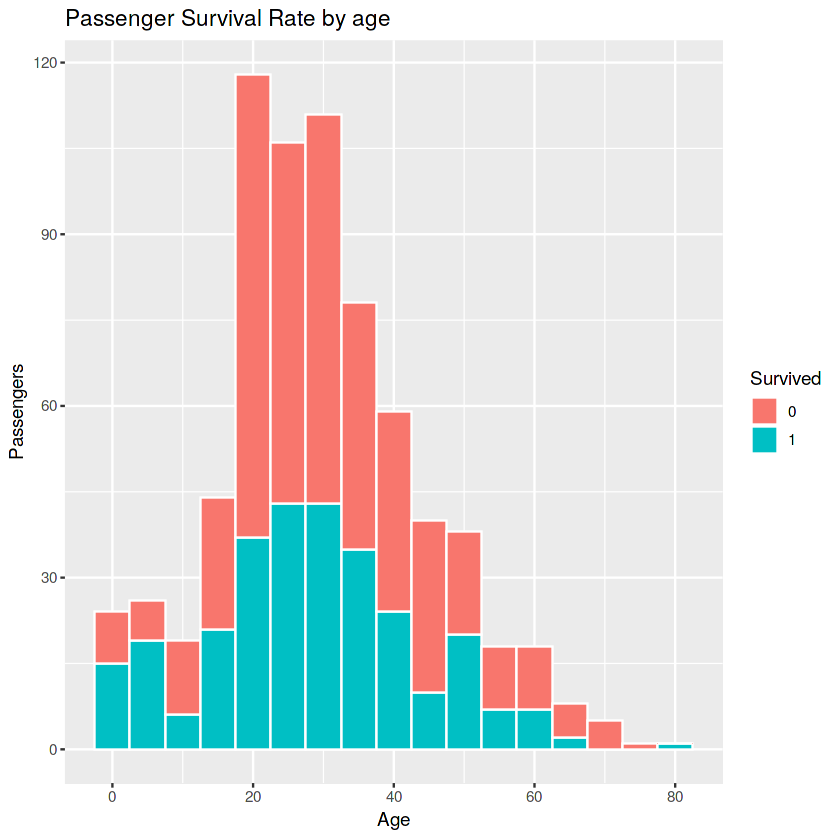

In [50]:
#Add Title and Axis labels
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  labs(x = "Age",y = "Passengers", title = "Passenger Survival Rate by age")

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


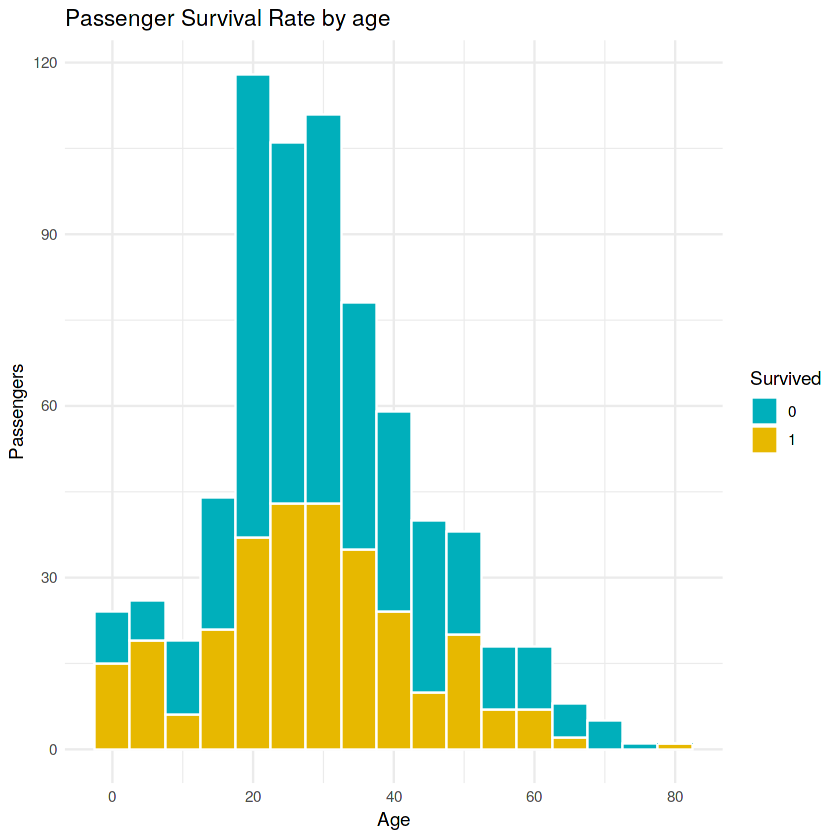

In [51]:
#Add a theme
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  labs(x = "Age",y = "Passengers", title = "Passenger Survival Rate by age") +
  theme_minimal()

In [ ]:
#Change Axis range to only view ages 10-60 without clipping
#if you want to remove data use xlim() ylim() NOT RECOMMENDED!
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  labs(x = "Age",y = "Passengers", title = "Passenger Survival Rate by age") +
  theme_classic() + 
  coord_cartesian(xlim = c(10,60))

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


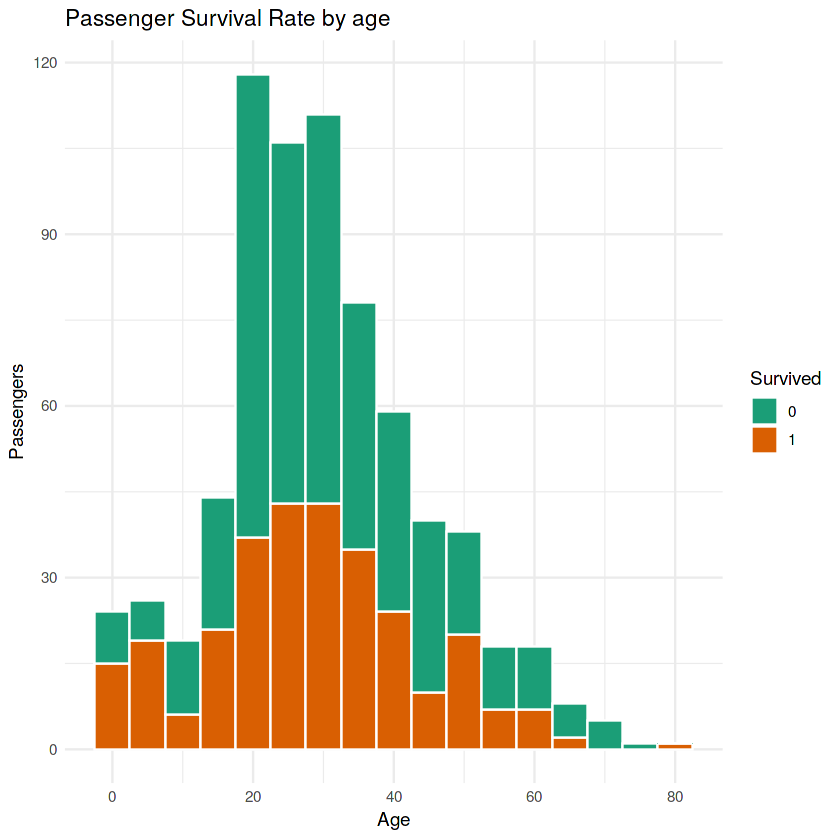

In [59]:
#Add color
ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  labs(x = "Age",y = "Passengers", title = "Passenger Survival Rate by age") +
  theme_minimal() + scale_fill_brewer(palette = "Dark2")

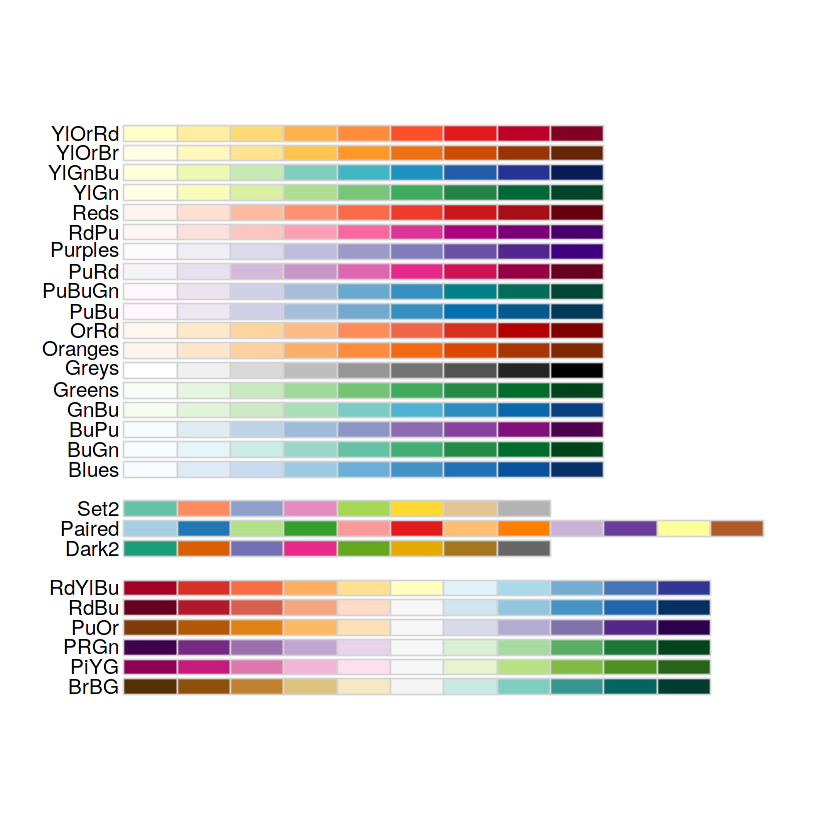

In [58]:
# more options for color
display.brewer.all(colorblindFriendly = TRUE)

In [53]:
#Change colors of bars
my_plot <- ggplot(titanic, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 5,color = "white") +
  labs(x = "Age",y = "Passengers", title = "Passenger Survival Rate by age") +
  theme_classic() + 
  coord_cartesian(xlim = c(10,60)) +
  scale_fill_manual(values = c("darkgray", "darkblue"))

In [54]:
#Saving Plots
#Saves last plot unless specified
ggsave("Final_Plot.png", width = 10, height =10)
ggsave("Final_Plot.png", plot = my_plot, width = 10, height =10)

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


# Helpful resources
* **[Data Visualization with ggplots Cheat Sheet](https://rstudio.com/wp-content/uploads/2016/11/ggplot2-cheatsheet-2.1.pdf)**
* **[R for Data Science](https://r4ds.had.co.nz/)**
* **[Geocomputation with R](https://geocompr.robinlovelace.net/)**
* **[Intro to GIS and Spatial Analysis](https://mgimond.github.io/Spatial/index.html)**

# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Questions ??

#  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$[Survey](https://qfreeaccountssjc1.az1.qualtrics.com/jfe/form/SV_6uvE6uJSwMwV1Up)
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$**Thank you for attending the workshop !!**


$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$**Your kind suggestions/feedbacks are more than welcome**